# **Multi Layer Perceptron for CIFAR10**


In [0]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

Load CIFAR10 dataset and prepare training/test sets

In [0]:
# Load CIFAR10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Get number of labels
num_labels = len(np.unique(y_train))

# Convert labels to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Get image dimension (image is assumed to be square)
image_size = x_train.shape[1]

# For MLP, the input dim is a vector, so we reshape
input_size = image_size * image_size * 3
x_train = np.reshape(x_train, [-1, input_size])
x_test = np.reshape(x_test, [-1, input_size])

# Resize image and normalize
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

170500096/170498071 [==============================] - 6s 0us/step


Set network parameters that will be used by MLP

In [0]:
batch_size = 128
hidden_units = [256,128,64]

The MLP Architecture has **three Dense layers** with decreasing number of nodes (256-128-64). The **ReLU** activation function is added after each Dense layer.

In [0]:
# MLP Architecture
# Dense-Dense-Dense-Dense-Activation
model = Sequential()
model.add(Dense(hidden_units[0], input_dim=input_size))
model.add(Activation('relu'))
model.add(Dense(hidden_units[1]))
model.add(Activation('relu'))
model.add(Dense(hidden_units[2]))
model.add(Activation('relu'))
model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.summary()

The MLP is trained over **200 epochs**. For every 20th epoch, Training & Test Data Accuracies are generated for evaluation. **Categorical Crossentropy** is chosen as the loss function and **Accuracy** is chosen as the metric since the MLP will perform **single label classification** (i.e. only one label can be correct).

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

# Train the MLP
i = 1
epoch = 20
epoch_num = []
train_acc = []
test_acc = []
while i <= 10:
  epoch_num.append(epoch * i)
  model.fit(x_train, y_train, epochs=20, batch_size=batch_size)
  train_score = model.evaluate(x_train, y_train, batch_size=batch_size)
  print("\nTrain accuracy: %.1f%%" % (100.0 * train_score[1]))
  train_acc.append(train_score[1])
  test_score = model.evaluate(x_test, y_test, batch_size=batch_size)
  print("\nTest accuracy: %.1f%%" % (100.0 * test_score[1]))
  test_acc.append(test_score[1])
  i = i + 1

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               786688    
_________________________________________________________________
activation (Activation)      (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
activation_2 (Activation)    (None, 64)                0         
____

The model's Training and Test Data Accuracy is plotted against the number of epochs performed during training. Looking at the plot, it can be observed that **as the number of epochs increase, Training Data Accuracy increases**. On the other hand, **Test Data Accuracy gradually decreases after 80 epochs**, indicating **model overfitting**.

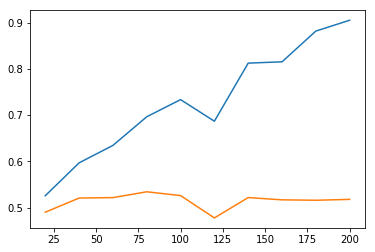

In [0]:
# Generate plot showing Training & Test Data Accuracy
plt.plot(epoch_num, train_acc)
plt.plot(epoch_num, test_acc)
plt.show()

In [0]:
# Generate table showing Training & Test Data Accuracy
df = pd.DataFrame(pd.concat([pd.Series(epoch_num),pd.Series(train_acc),pd.Series(test_acc)], axis=1))
df.columns = ['Epoch','Training Data Accuracy','Test Data Acccuracy']
df

,0,1,2
0,20,0.52552,0.4899
1,40,0.59664,0.5205
2,60,0.63434,0.5214
3,80,0.69628,0.5340
4,100,0.73336,0.5258
5,120,0.68666,0.4775
6,140,0.81230,0.5215
7,160,0.81510,0.5166
8,180,0.88160,0.5157
9,200,0.90502,0.5176


**MLP generated lower Test Data Accuracy than CNN (MLP @ 53.40%, CNN @ 75.04%)**. Since MLP's input is a one-dimensional vector (i.e. each pixel of the image is a feature), **model training is inefficient**. Multiple layers are needed before highly distinctive areas of the image can stand out. With only three layers, MLP pales in comparison to CNN when it comes to image data.